## Cleaning Data

In this project we'll clean some data from two surveys: with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

We want to answer the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

This project is basic a cleaning job. The data is very messy and we'll clean so that HR can better understand of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Cleaning the Columns

Before actually cleaning the data we'll drop some columns with information that we deem irrelevant.

We want to relate the years of employment to dissatisfaction and the age to dissatisfaction on the employees who have resigned.

So, any information that does not belong to these category (for instance, if the employee left because of retirement or because of marriage, etc.) are dropped, for the purpose of our analysis.

### The `dete_survey` dataframe

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

There are some factors for the separation that look like motives for dissatisfaction (e.g., `Lack of recognition`). I'd include them for now.

In [3]:
dete_stay = ['SeparationType', 'Cease Date', 'DETE Start Date', 'Role Start Date', 'Interpersonal conflicts', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Employment conditions', 'Work life balance', 'Workload', 'Age']

dete_survey = dete_survey[dete_stay]

In [4]:
# renaming columns
def snakefy(cols):
    cols = cols.str.strip().str.lower().str.replace(' ', '_')
    return cols

dete_survey.columns = snakefy(dete_survey.columns)
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 14 columns):
separationtype                         822 non-null object
cease_date                             822 non-null object
dete_start_date                        822 non-null object
role_start_date                        822 non-null object
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_environment              822 non-null bool
lack_of_recognition                    822 non-null bool
lack_of_job_security                   822 non-null bool
employment_conditions                  822 non-null bool
work_life_balance                      822 non-null bool
workload                               822 non-null bool
age                                    811 non-null object
dtypes: bool(9), object(5)
memory usage: 39.5+ KB


In [5]:
# examining data

dete_survey.describe(include='all')

,separationtype,cease_date,dete_start_date,role_start_date,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,employment_conditions,work_life_balance,workload,age
count,822,822,822,822,822,822,822,822,822,822,822,822,822,811
unique,9,25,51,46,2,2,2,2,2,2,2,2,2,10
top,Age Retirement,2012,Not Stated,Not Stated,False,False,False,False,False,False,False,False,False,61 or older
freq,285,344,73,98,788,733,761,806,765,794,788,605,735,222


In [6]:
# we see some NaN data that is written as Not Stated, so:
dete_survey = dete_survey.replace('Not Stated', np.nan)

In [7]:
# transforming objects into numbers. First, we take a look at the unique values:
numeric = ['cease_date', 'dete_start_date', 'role_start_date']
for nums in numeric:
    print(nums+' : ')
    print(dete_survey[nums].unique())
    print('\n')

cease_date : 
['08/2012' '05/2012' '07/2012' '2012' '2013' '2014' '2010' '09/2013'
 '07/2013' '08/2013' '06/2013' '04/2013' '05/2013' '09/2010' '01/2014'
 '11/2012' '04/2014' '12/2013' '07/2014' '10/2013' '11/2013' nan '09/2014'
 '07/2006' '02/2014']


dete_start_date : 
['1984' nan '2011' '2005' '1970' '1994' '1972' '1988' '2009' '1997' '1999'
 '1998' '1967' '2007' '1995' '1996' '2006' '1989' '1982' '1980' '1973'
 '1981' '1974' '1975' '1978' '2003' '2000' '1977' '1976' '1985' '2008'
 '1963' '1993' '1979' '1990' '1969' '1966' '2010' '1968' '1991' '1971'
 '2002' '1986' '2004' '2012' '1983' '2001' '1987' '1992' '2013' '1965']


role_start_date : 
['2004' nan '2011' '2006' '1989' '1997' '2007' '1990' '2009' '2008' '1999'
 '1998' '2000' '2010' '1996' '1982' '2012' '1981' '2002' '1977' '2003'
 '1978' '1992' '1980' '1994' '1976' '1991' '2001' '1993' '1983' '1987'
 '1985' '1975' '1986' '1979' '1988' '2005' '1995' '1970' '1984' '200'
 '1974' '2013' '1971' '1973' '1972']




In [8]:
dete_survey['cease_date'] = dete_survey['cease_date'].str.split('/').str[-1]
dete_survey['cease_date'].unique()

array(['2012', '2013', '2014', '2010', nan, '2006'], dtype=object)

In [9]:
dete_survey[numeric] = dete_survey[numeric].astype(float)
dete_survey[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 3 columns):
cease_date         788 non-null float64
dete_start_date    749 non-null float64
role_start_date    724 non-null float64
dtypes: float64(3)
memory usage: 19.4 KB


In [10]:
dete_survey.describe()

,cease_date,dete_start_date,role_start_date
count,788.000000,749.000000,724.000000
mean,2012.598985,1994.182911,1998.955801
std,0.662366,13.880503,67.792281
min,2006.000000,1963.000000,200.000000
25%,2012.000000,1982.000000,1995.000000
50%,2013.000000,1996.000000,2005.000000
75%,2013.000000,2007.000000,2010.000000
max,2014.000000,2013.000000,2013.000000


In [11]:
# role_start_date has a weird minimum. Its probably meant to be 2000 instead of 200.
dete_survey[dete_survey['role_start_date'] == 200] = 2000
dete_survey.describe()

,cease_date,dete_start_date,role_start_date
count,788.000000,749.000000,724.000000
mean,2012.582487,1994.182911,2001.441989
std,0.799967,13.880503,10.652473
min,2000.000000,1963.000000,1970.000000
25%,2012.000000,1982.000000,1995.000000
50%,2013.000000,1996.000000,2005.000000
75%,2013.000000,2007.000000,2010.000000
max,2014.000000,2013.000000,2013.000000


In [12]:
# finally, let's restrict the data to the people who have resigned.
dete_survey['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination', 2000], dtype=object)

In [13]:
dete_survey['separationtype'] = dete_survey['separationtype'].str.split('-').str[0]
dete_survey = dete_survey[dete_survey['separationtype'] == 'Resignation']

In [14]:
dete_survey.describe(include='all')

,separationtype,cease_date,dete_start_date,role_start_date,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,employment_conditions,work_life_balance,workload,age
count,310,299.000000,282.000000,270.000000,310,310,310,310,310,310,310,310,310,305
unique,1,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,10
top,Resignation,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,41-45
freq,310,NaN,NaN,NaN,290,269,281,304,277,296,287,242,283,48
mean,NaN,2012.598662,2002.074468,2006.318519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.754938,9.931337,7.269278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2006.000000,1963.000000,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,1997.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,2005.500000,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,2010.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing `NaN`s

Now I'll address the NaNs issue. 

FIrst, let's visualize where they concentrate. The graph below shows where they concentrate: black is for a NaN value and the off-white for a good value.

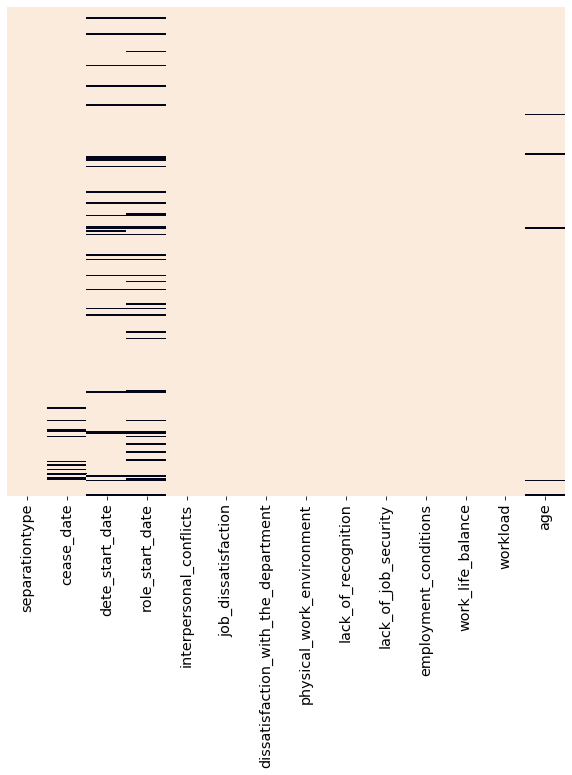



separationtype                          0
cease_date                             11
dete_start_date                        28
role_start_date                        40
interpersonal_conflicts                 0
job_dissatisfaction                     0
dissatisfaction_with_the_department     0
physical_work_environment               0
lack_of_recognition                     0
lack_of_job_security                    0
employment_conditions                   0
work_life_balance                       0
workload                                0
age                                     5
dtype: int64


In [15]:
def plot_null_matrix(df, figsize=(10,9)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
plot_null_matrix(dete_survey)
print('\n')
print(dete_survey.isnull().sum())

One first thing we could do is to assume that where the `dete_start_date` is missing its the same as the `role_start_date` and vice-versa.

In [16]:
dete_survey['dete_start_date'].fillna(dete_survey['role_start_date'], inplace=True)
dete_survey['role_start_date'].fillna(dete_survey['dete_start_date'], inplace=True)

Now, this does not eliminate all the NaNs in `*_start_date`. But we can't really work without this information (because, below, we will use the variable length of service to unify with the `tafe_survey`), so we'll have to drop it.

In [17]:
print(dete_survey['cease_date'].isnull().sum()/len(dete_survey['cease_date']))

0.035483870967741936


Next, we see some few missing values on the `cease_date` and the `age`. We can't really do any analysis relating the time on employment with the age if the age is missing. 

We could work something out for the `cease_date` but its probably less damaging to our analysis to drop the none values, since there's not much of them (only about 3.5%) and we won't be introducint a new Ansatz to our problem.

In [18]:
dete_survey.dropna(subset = ['cease_date', 'age', 'role_start_date'], inplace=True)

In [19]:
print(dete_survey.isnull().sum())

separationtype                         0
cease_date                             0
dete_start_date                        0
role_start_date                        0
interpersonal_conflicts                0
job_dissatisfaction                    0
dissatisfaction_with_the_department    0
physical_work_environment              0
lack_of_recognition                    0
lack_of_job_security                   0
employment_conditions                  0
work_life_balance                      0
workload                               0
age                                    0
dtype: int64


In [20]:
dete_survey['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '56-60', '51-55',
       '61 or older', '21-25', '26-30', '20 or younger'], dtype=object)

In [21]:
dete_survey[dete_survey['age'] == '36-40']['dete_start_date'].mean()

2006.111111111111

In [22]:
for ages in dete_survey['age'].unique():
    print(ages + ' : ')
    print(dete_survey[dete_survey['age'] == ages]['dete_start_date'].mean().astype(int).astype(float))
    print('\n')

36-40 : 
2006.0


41-45 : 
2001.0


31-35 : 
2006.0


46-50 : 
2000.0


56-60 : 
1992.0


51-55 : 
1996.0


61 or older : 
1989.0


21-25 : 
2010.0


26-30 : 
2008.0


20 or younger : 
2011.0




### The `tafe_survey` dataframe

In [23]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

There's a lot of information here. To combine both tables we should keep the information contained on both. Remember, the factors we selected from the dete_survey dataframe were the following: `interpersonal_conflicts`, `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`, `lack_of_job_security`, `employment_conditions`, `work_life_balance` and `workload`

In [24]:
change = {'Contributing Factors. Dissatisfaction' : 'dissatisfaction_with_the_department',\
          'Contributing Factors. Job Dissatisfaction': 'job_dissatisfaction',\
          'Contributing Factors. Interpersonal Conflict': 'interpersonal_conflicts',\
          'InstituteViews. Topic:6. The organisation recognised when staff did good work': 'lack_of_recognition',\
          'WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction': 'work_life_balance',\
          'WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area': 'physical_work_environment',\
          'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me': 'lack_of_job_security',\
         'WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job': 'workload'}

The only category I couldn't find that would be equivalent on the dete_survey df is the `employment_conditions`. I'll simply drop it from the dete_survey

In [25]:
dete_survey = dete_survey.drop(columns=['employment_conditions'])

As a first clean up, I'll simply change the column names using the `change` dictionary above and remove any other column with WorkUnitViews, etc., etc.

In [26]:
tafe_survey = tafe_survey.rename(columns=change)

pattern = r"(Contributing Factors)|(InstituteViews)|(WorkUnitViews)|(Workplace. Topic)|(Induction)|(InductionInfo)"
table_1 = ~tafe_survey.columns.str.contains(pattern)

tafe_survey = tafe_survey[tafe_survey.columns[table_1]]
tafe_survey.columns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment', 'dissatisfaction_with_the_department',
       'job_dissatisfaction', 'interpersonal_conflicts',
       'Main Factor. Which of these was the main factor for leaving?',
       'lack_of_recognition', 'lack_of_job_security', 'workload',
       'work_life_balance', 'physical_work_environment',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

Now, I'll drop the remaining columns I don't want and rename the columns that have the pattern of `wordwordword. word word word`. It will simply be `wordwordword` and then we deal with it.

In [27]:
tafe_survey = tafe_survey.drop(columns=['Record ID', 'Institute', 'WorkArea', 'Employment Type. Employment Type', 'Main Factor. Which of these was the main factor for leaving?', 'Classification. Classification'])

pattern2 = r"(.+)(?=\.\s)"
col_values = tafe_survey.columns[tafe_survey.columns.str.contains(pattern2)].str.extract(pattern2)[0].values.tolist()
# above we do the following: take only the columns that contains the pattern2, extract the capture group we created and this generates a df. We take the values and transform it into a list.
col_keys = tafe_survey.columns[tafe_survey.columns.str.contains(pattern2)].tolist()
# then we take the name of the columns that match the pattern2, as they are, to be the keys of our dictionary.
col_renames = dict(zip(col_keys,col_values))

tafe_survey = tafe_survey.rename(columns=col_renames)

Finally, we rename the columns according to the pattern we established for the dete_survey

In [28]:
tafe_survey.columns = snakefy(tafe_survey.columns)
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 14 columns):
cessation_year                         695 non-null float64
reason_for_ceasing_employment          701 non-null object
dissatisfaction_with_the_department    437 non-null object
job_dissatisfaction                    437 non-null object
interpersonal_conflicts                437 non-null object
lack_of_recognition                    607 non-null object
lack_of_job_security                   610 non-null object
workload                               610 non-null object
work_life_balance                      611 non-null object
physical_work_environment              610 non-null object
gender                                 596 non-null object
currentage                             596 non-null object
lengthofserviceoverall                 596 non-null object
lengthofservicecurrent                 596 non-null object
dtypes: float64(1), object(13)
memory usage: 76.9+ KB


Restricting the data to resignation:

In [29]:
tafe_survey['reason_for_ceasing_employment'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [30]:
tafe_survey = tafe_survey[tafe_survey['reason_for_ceasing_employment'] == 'Resignation']

In [31]:
tafe_survey.describe(include='all')

,cessation_year,reason_for_ceasing_employment,dissatisfaction_with_the_department,job_dissatisfaction,interpersonal_conflicts,lack_of_recognition,lack_of_job_security,workload,work_life_balance,physical_work_environment,gender,currentage,lengthofserviceoverall,lengthofservicecurrent
count,335.000000,340,332,332,332,294,294,294,295,295,290,290,290,290
unique,NaN,1,2,2,2,6,6,6,6,6,2,9,7,7
top,NaN,Resignation,-,-,-,Agree,Agree,Agree,Agree,Agree,Female,41 45,Less than 1 year,Less than 1 year
freq,NaN,340,277,270,308,97,132,138,125,105,191,45,73,92
mean,2011.394030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.005952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's deal with the `Factor` kind of questions -- the ones that are quickly transformed into boolean.

In [32]:
factors = ['dissatisfaction_with_the_department', 'job_dissatisfaction', 'interpersonal_conflicts']

for facs in factors:
    print(facs+' : ')
    print(tafe_survey[facs].unique())
    print('\n')

dissatisfaction_with_the_department : 
['-' 'Contributing Factors. Dissatisfaction ' nan]


job_dissatisfaction : 
['-' 'Job Dissatisfaction' nan]


interpersonal_conflicts : 
['-' nan 'Interpersonal Conflict']




What I gather is that `-` means False and the other things written mean True

In [33]:
tafe_survey = tafe_survey.replace('-', False)

pattern3 = r".+"
tafe_survey[factors] = tafe_survey[factors].replace(pattern3, True, regex=True)

Now, I'll deal with the questions -- the columns with Agree, and so on

In [34]:
questions = ['lack_of_recognition', 'lack_of_job_security', 'workload', 'work_life_balance', 'physical_work_environment']

for q in questions:
    print(q+' : ')
    print(tafe_survey[q].unique())
    print('\n')

lack_of_recognition : 
['Agree' 'Strongly Agree' 'Neutral' 'Strongly Disagree' nan 'Disagree'
 'Not Applicable']


lack_of_job_security : 
['Agree' 'Neutral' 'Strongly Agree' nan 'Disagree' 'Not Applicable'
 'Strongly Disagree']


workload : 
['Strongly Agree' 'Neutral' 'Disagree' 'Agree' nan 'Not Applicable'
 'Strongly Disagree']


work_life_balance : 
['Strongly Agree' 'Disagree' 'Agree' nan 'Neutral' 'Not Applicable'
 'Strongly Disagree']


physical_work_environment : 
['Strongly Agree' 'Disagree' 'Neutral' 'Agree' nan 'Strongly Disagree'
 'Not Applicable']




I don't have much choice but to consider `Not Applicable` as a NaN. Let's see it's frequency:

In [35]:
for q in questions:
    print(q+' : ')
    print(tafe_survey[q].value_counts())
    print('\n')

lack_of_recognition : 
Agree                97
Neutral              70
Disagree             46
Strongly Agree       42
Strongly Disagree    36
Not Applicable        3
Name: lack_of_recognition, dtype: int64


lack_of_job_security : 
Agree                132
Strongly Agree        50
Neutral               48
Disagree              31
Strongly Disagree     30
Not Applicable         3
Name: lack_of_job_security, dtype: int64


workload : 
Agree                138
Strongly Agree        66
Neutral               47
Disagree              26
Strongly Disagree     12
Not Applicable         5
Name: workload, dtype: int64


work_life_balance : 
Agree                125
Strongly Agree        70
Neutral               46
Disagree              35
Strongly Disagree     16
Not Applicable         3
Name: work_life_balance, dtype: int64


physical_work_environment : 
Agree                105
Strongly Agree        88
Neutral               52
Disagree              36
Strongly Disagree     11
Not Applicable  

Thankfully `Not Applicable` doesn't appear much. I'll change it to an official NaN.

Also, I'll do a naive assignment: Agree = Strongly Agree and the same for Disagree. Depending on the question, Neutral will be False or True (for instance, if `work_life_balance` is an issue, we want Neutral to be False).

Here I'll have to look to the dictionary above to see how to make the assignments.

The dictinary is:

* The organisation recognised when staff did good work': 'lack_of_recognition'

* My job allowed me to balance the demands of work and family to my satisfaction': 'work_life_balance'

* My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area': 'physical_work_environment'

* I was kept informed of the changes in the organisation which would affect me': 'lack_of_job_security'

* I was able to cope with the level of stress and pressure in my job': 'workload'

Now, in order for these columns to have information compatible with the `dete_survey` we'll have to switch True and False. For example, when the question "The organisation recognised when staff did good work" is true, it means there was recognition. But we're transforming this into `lack_of_recognition`, so when the person agrees we should substitute it with False.

Therefore, we have the following assignments:

* `lack_of_recognition`: Agree = False, Disagree = True;  
* `work_life_balance`: Agree = False, Disagree = True;  
* `physical_work_environment`: Agree = False, Disagree = True;  
* `lack_of_job_security`: Agree = False, Disagree = True;  
* `workload`: Agree = False, Disagree = True.

In [36]:
tafe_survey[questions] = tafe_survey[questions].replace('Not Applicable', np.nan).replace('Agree', False).replace('Strongly Agree', False).replace('Disagree', True).replace('Strongly Disagree', True).replace('Neutral', False)

tafe_survey[questions]

,lack_of_recognition,lack_of_job_security,workload,work_life_balance,physical_work_environment
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,True,True
6,False,False,False,False,False
7,False,False,True,True,False
...,...,...,...,...,...
696,False,False,False,False,False
697,False,False,False,False,False
698,NaN,NaN,NaN,NaN,NaN
699,False,False,False,False,False


## Age and Years of Service

Now I'll focus on the age and the years of service.

### The `dete_survey` dataframe

In [37]:
dete_survey

,separationtype,cease_date,dete_start_date,role_start_date,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_life_balance,workload,age
3,Resignation,2012.0,2005.0,2006.0,False,False,False,False,False,False,False,False,36-40
5,Resignation,2012.0,1994.0,1997.0,False,False,False,False,False,False,False,False,41-45
8,Resignation,2012.0,2009.0,2009.0,False,False,False,False,False,False,False,False,31-35
9,Resignation,2012.0,1997.0,2008.0,True,True,True,False,False,False,False,False,46-50
11,Resignation,2012.0,2009.0,2009.0,False,False,False,False,False,False,False,False,31-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Resignation,2013.0,2004.0,2004.0,False,False,True,False,False,False,True,False,36-40
808,Resignation,2013.0,2010.0,2010.0,False,False,False,False,False,False,False,False,26-30
815,Resignation,2014.0,2012.0,2012.0,False,False,False,False,False,False,False,False,21-25
816,Resignation,2014.0,2012.0,2012.0,False,False,False,False,False,False,False,False,21-25


In [38]:
dete_survey['lengthofserviceoverall'] = dete_survey['cease_date'] - dete_survey['dete_start_date']
dete_survey['lengthofservicecurrent'] = dete_survey['cease_date'] - dete_survey['role_start_date']

In [39]:
tafe_survey['lengthofserviceoverall'].unique()

array([nan, '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [40]:
tafe_survey['lengthofserviceoverall'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: lengthofserviceoverall, dtype: int64

In [41]:
dete_survey['lengthofserviceoverall'].unique()

array([ 7., 18.,  3., 15., 14.,  5., 30., 32., 39., 17.,  9.,  6.,  1.,
       35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 16., 12.,
       21., 20., 24., 33., 13., 22., 28., 49., 11., 41., 27., 42., 25.,
       29., 34., 31.])

In [42]:
def categorize_len(val):
    if val < 1:
        return 'Less than 1 year'
    elif 1 <= val <= 2:
        return '1-2'
    elif 3 <= val <= 4:
        return '3-4'
    elif 5 <= val <= 6:
        return '5-6'
    elif 7 <= val <= 10:
        return '7-10'
    elif 11 <= val <= 20:
        return '11-20'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'More than 20 years'
    
dete_survey['lengthofserviceoverall'] = dete_survey['lengthofserviceoverall'].apply(categorize_len)

In [43]:
dete_survey['lengthofserviceoverall'].value_counts()

11-20                 55
More than 20 years    43
7-10                  41
5-6                   40
1-2                   37
3-4                   36
Less than 1 year      19
Name: lengthofserviceoverall, dtype: int64

In [44]:
dete_survey['lengthofservicecurrent'] = dete_survey['lengthofservicecurrent'].apply(categorize_len)

In [45]:
dete_survey['lengthofservicecurrent'].value_counts()

1-2                   65
3-4                   45
5-6                   37
11-20                 37
Less than 1 year      34
7-10                  33
More than 20 years    20
Name: lengthofservicecurrent, dtype: int64

Now, the age. 

In [46]:
dete_survey['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '56-60', '51-55',
       '61 or older', '21-25', '26-30', '20 or younger'], dtype=object)

In [47]:
tafe_survey = tafe_survey.rename(columns={'currentage':'age'})

In [48]:
tafe_survey['age'] = tafe_survey['age'].str.replace('  ', '-')

In [49]:
print(dete_survey['age'].unique())
print('\n')
print(tafe_survey['age'].unique())


['36-40' '41-45' '31-35' '46-50' '56-60' '51-55' '61 or older' '21-25'
 '26-30' '20 or younger']


[nan '41-45' '56 or older' '20 or younger' '46-50' '36-40' '21-25' '31-35'
 '26-30' '51-55']


In [50]:
def group_age(val):
    if val == '56-60' or val == '61 or older':
        return '56 or older'
    elif pd.isnull(val):
        return np.nan
    else:
        return val

dete_survey['age'] = dete_survey['age'].apply(group_age)

In [51]:
print(dete_survey['age'].unique())
print('\n')
print(tafe_survey['age'].unique())

['36-40' '41-45' '31-35' '46-50' '56 or older' '51-55' '21-25' '26-30'
 '20 or younger']


[nan '41-45' '56 or older' '20 or younger' '46-50' '36-40' '21-25' '31-35'
 '26-30' '51-55']


### Removing NaNs from the `tafe_survey`

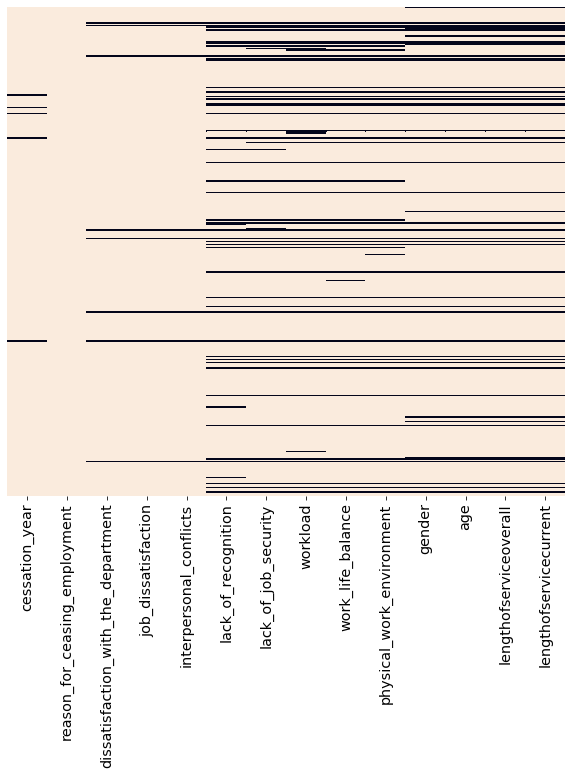

In [52]:
plot_null_matrix(tafe_survey)

There are few things to notice here: we can't really work with data that doesn't contain the `age` variable, but as per the estimative below there's about 15% of rows that doesn't contain the `age` information.

Now, the only thing we could do here is to estimate the age based on the `lengthofserviceoverall`, but we can't really do this, because every row with a NaN in `age` is also a NaN in `lengthofserviceoverall`, as well as in `lengthofservicecurrent` (*vide infra*).

In this case we have no recourse but to drop these rows.

In [53]:
print(tafe_survey['age'].isnull().sum()/len(tafe_survey['age']))

0.14705882352941177


In [54]:
print((tafe_survey['age'].isnull() == tafe_survey['lengthofserviceoverall'].isnull()).unique())
print('-'*10)
print((tafe_survey['age'].isnull() == tafe_survey['lengthofservicecurrent'].isnull()).unique())

[ True]
----------
[ True]


In [55]:
tafe_survey.dropna(subset = ['age'], inplace=True)
tafe_survey.isnull().sum()

cessation_year                         2
reason_for_ceasing_employment          0
dissatisfaction_with_the_department    0
job_dissatisfaction                    0
interpersonal_conflicts                0
lack_of_recognition                    8
lack_of_job_security                   7
workload                               9
work_life_balance                      6
physical_work_environment              6
gender                                 0
age                                    0
lengthofserviceoverall                 0
lengthofservicecurrent                 0
dtype: int64

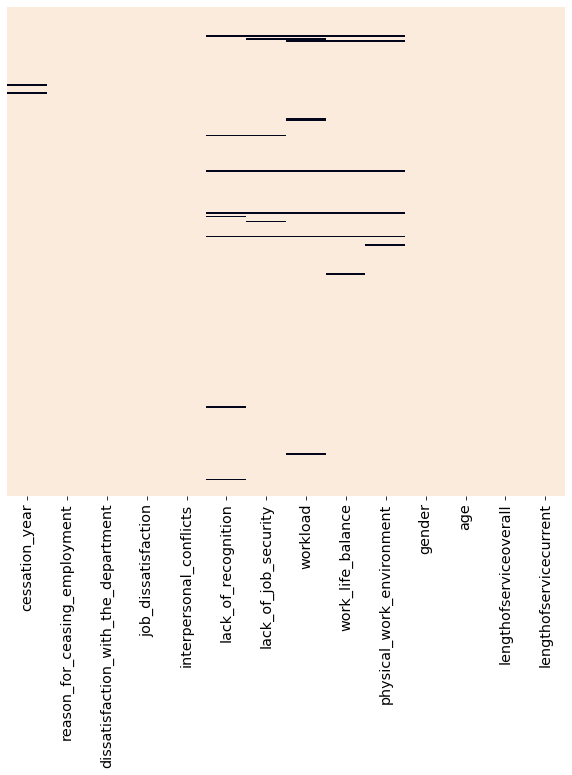

In [56]:
plot_null_matrix(tafe_survey)

Another Ansatz that is reasonable to adopt is the following: if there's a NaN in the questions of `lack_of_recognition` and so on we should substitute it with a `False`. Because if it was `True`, then the person doing the quiz would probably fill it out; while in the case of `False` the person might just ignore it and leave it blank.

In [57]:
values = {'lack_of_recognition':False, 'lack_of_job_security':False, 'workload':False, 'work_life_balance':False, 'physical_work_environment':False}
tafe_survey.fillna(value=values, inplace=True)

tafe_survey.isnull().sum()

cessation_year                         2
reason_for_ceasing_employment          0
dissatisfaction_with_the_department    0
job_dissatisfaction                    0
interpersonal_conflicts                0
lack_of_recognition                    0
lack_of_job_security                   0
workload                               0
work_life_balance                      0
physical_work_environment              0
gender                                 0
age                                    0
lengthofserviceoverall                 0
lengthofservicecurrent                 0
dtype: int64

## Combining the two dataframes

In [58]:
dete_survey

,separationtype,cease_date,dete_start_date,role_start_date,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_life_balance,workload,age,lengthofserviceoverall,lengthofservicecurrent
3,Resignation,2012.0,2005.0,2006.0,False,False,False,False,False,False,False,False,36-40,7-10,5-6
5,Resignation,2012.0,1994.0,1997.0,False,False,False,False,False,False,False,False,41-45,11-20,11-20
8,Resignation,2012.0,2009.0,2009.0,False,False,False,False,False,False,False,False,31-35,3-4,3-4
9,Resignation,2012.0,1997.0,2008.0,True,True,True,False,False,False,False,False,46-50,11-20,3-4
11,Resignation,2012.0,2009.0,2009.0,False,False,False,False,False,False,False,False,31-35,3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Resignation,2013.0,2004.0,2004.0,False,False,True,False,False,False,True,False,36-40,7-10,7-10
808,Resignation,2013.0,2010.0,2010.0,False,False,False,False,False,False,False,False,26-30,3-4,3-4
815,Resignation,2014.0,2012.0,2012.0,False,False,False,False,False,False,False,False,21-25,1-2,1-2
816,Resignation,2014.0,2012.0,2012.0,False,False,False,False,False,False,False,False,21-25,1-2,1-2


In [59]:
tafe_survey = tafe_survey.drop(columns=['cessation_year', 'reason_for_ceasing_employment', 'gender'])
dete_survey = dete_survey.drop(columns=['separationtype', 'cease_date', 'dete_start_date', 'role_start_date'])

In [60]:
combined = pd.concat([dete_survey, tafe_survey], ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


We can now go on and create a new variable: `dissatisfaction`, which will indicate if the person resigned because he or she was not satisfied.

In [61]:
combined.columns

Index(['age', 'dissatisfaction_with_the_department', 'interpersonal_conflicts',
       'job_dissatisfaction', 'lack_of_job_security', 'lack_of_recognition',
       'lengthofservicecurrent', 'lengthofserviceoverall',
       'physical_work_environment', 'work_life_balance', 'workload'],
      dtype='object')

In [62]:
dissatisfaction_indicators = ['dissatisfaction_with_the_department', 'interpersonal_conflicts',
       'job_dissatisfaction', 'lack_of_job_security', 'lack_of_recognition',
       'physical_work_environment', 'work_life_balance', 'workload']
combined['dissatisfaction'] = combined[dissatisfaction_indicators].any(1)

### Age and dissatisfaction

In [63]:
list(combined['age'].unique())

['36-40',
 '41-45',
 '31-35',
 '46-50',
 '56 or older',
 '51-55',
 '21-25',
 '26-30',
 '20 or younger']

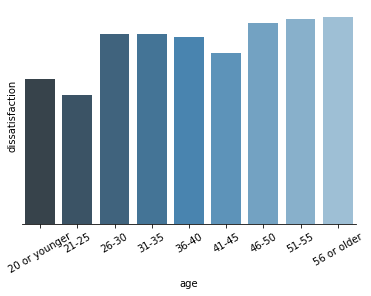

In [64]:
order = ['20 or younger', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56 or older']
ax = sns.barplot(x = "age", y = 'dissatisfaction', data = combined, order=order, palette="Blues_d", ci=None)
plt.xticks(rotation=30)
corners = ['right','left','top']
for c in corners:
    ax.spines[c].set_visible(False)
ax.set(yticks=[])
plt.show()

There is indeed a very weak tendency here: the more older the person, the more he or she will resign due to insatisfaction.

This is intuitively true: the younger one is the more reasons one has to leave a post -- another job offer, for instance. But the older one gets, more one seeks stability, and so the reason for resignation will be more due to insatisfaction than others. 
On the other hand, the `20 or younger` people might be in jobs that are not very glamorous -- thus their dissatisfaction.

### Seniority and dissatisfaction

In [65]:
list(combined['lengthofserviceoverall'].unique())

['7-10',
 '11-20',
 '3-4',
 '5-6',
 'More than 20 years',
 '1-2',
 'Less than 1 year']

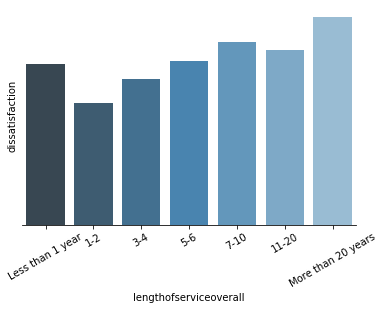

In [66]:
order = ['Less than 1 year', '1-2', '3-4', '5-6', '7-10', '11-20', 'More than 20 years']
ax = sns.barplot(x = "lengthofserviceoverall", y = 'dissatisfaction', data = combined, order = order, palette="Blues_d", ci=None)
plt.xticks(rotation=30)
corners = ['right','left','top']
for c in corners:
    ax.spines[c].set_visible(False)
ax.set(yticks=[])
plt.show()

We see the same weak trend that we saw in the `age` vs `dissatisfaction` graph: more senior people (and this, I assume, correlates with old age) tend to resign with more dissatisfaction. People with less than 1 year probably just didn't fit very well in the job, thus their dissatisfaction

## Conclusion

Thus we conclude this cleaning job. We created a neat dataframe to investigate dissatisfaction. We could easily include other data, such as gender and so on.

All this proccess could easily be adapted to any other need HR might have.